In this notebook, using the <b>Qiskit</b> library, we will explore the basics routines in quantum computing, getting to know how to build a quantum circuit, inputing classical and quantum bits (<i>qubits</i>), attaching common gates, and also how to obtain measures from it, in order to use it for computational purposes.

This is going to be the foundation of our familiarity with the library, and once we've got the hang of it, we may use those basic building blocks to implement more intricate quantum algorithms.

In [1]:
from qiskit import *
%matplotlib inline

### Building a quantum circuit

First, we are going to create two registers, one for qubits and one for classical bits. The ```ClassicalRegister``` will allow us to retrieve outcomes from the measurement operations on the circuit. Moreover, by passing a single integer onto the argument of those classes, we will be saying how many bits (quantum or classic) we want to have on our setup.

In [2]:
qr = QuantumRegister(2) # a quantum register with 2 qubits
cr = ClassicalRegister(2) # a classical register with 2 bits

Now, we may start to build a circuit, in order to perform some desired operation. To do so, we need to input the qubits and classical bits we've created into a ```QuantumCircuit``` structure. Besides that, you can always call the ```draw()```  method for this class in order to visualize what the circuit is looking like. Throughout this notebook, I will always draw the diagram whenever the circuit has undergone some changes, hoping this can make the procedure easier to read.

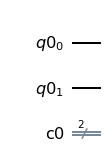

In [3]:
qc = QuantumCircuit(qr, cr) # initializing the quantum circuit using the qubits
                            # and classical bits from qr and cr registers 
qc.draw(output = 'mpl')

Right now, our circuit doesn't do anything, it's just an old identity operator on the quantum states represented by the qubits. 

⭐️ <i>By the way, the input qubits are initialized, by default, in the basis state $\left\lvert 0 \right\rangle.$ </i>

In order to make things a little bit more interesting, we need to _effectively_ build a circuit, i.e. introducing gates (operators) that will induce changes to the qubits. As an example, let us build a simple, yet intriguing, circuit. I will not spoil what it exactly does right now... Be carried away by the mystery! 😉

Okay, so our system will consist of only two gates: a Hadamard and a CNOT. First, we'll apply the Hadamard gate onto the $q_{0}^{(0)}$ qubit, right after its input line, and then, we'll implement the quantum CNOT gate onto the qubit pair $\left( q_{0}^{(0)}, q_{0}^{(1)} \right)$, using the first one as a _control_ qubit and the other one as a _target_ qubit.

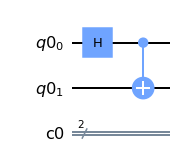

In [4]:
qc.h(qr[0]) # implementing Hadamard to q0_0 qubit
qc.cx(qr[0], qr[1]) # adding CNOT to the pair q0_0 (control) and q0_1 (target)
qc.draw(output = 'mpl')

Now, in order to be able to evaluate how it works, we need to perform a measurement on the qubits in our quantum register. The outcomes of the circuit are then stored into the bits of the classical register.

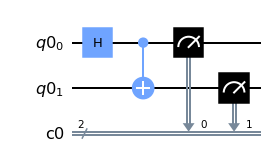

In [5]:
qc.measure(qr, cr)
qc.draw(output = 'mpl')

There we have it: our first quantum circuit. In the next steps, we are going to run this circuit (in two different manners!) and see what results we get. However, before that, I would like to present some things. 

Firstly, I wanna show that the above diagram can be drawn in some (slightly) distinct ways, which I find particularly easier to understand, as we can explicitly see where things come from (i.e. the qubits initial states) and where they go to (i.e. which classical bits the measurement results went to).

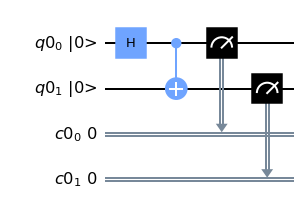

In [6]:
# the *initial_state* parameter is False by default; set it to True if you wanna see them;
# the *cregbundle* parameter is True by default, it ""joins"" the diagrams of classical bits 
# in the same register; set it to False to see them individually.
qc.draw(output = 'mpl', initial_state = True, cregbundle = False) 

And secondly, I want to analytically determine the final state of this circuit and, once we've got it, probabilities can be calculated.

#### Theoretical Evaluation: Qubit Pair Final State & Outcomes Probabilities

Our quantum register comprises two quantum bits, respectively denoted $q_{0}^{(0)}$ and $q_{0}^{(1)}$. Their corresponding initial quantum states are going to be generically represented by the _kets_ $\left\lvert \psi_{0}^{(0)} \right\rangle$ and $\left\lvert \psi_{0}^{(1)} \right\rangle$; hence, the initial state of the 2-qubit input can be written as the tensor product of those vectors,

$$\left\lvert \hspace{0.8pt} \Psi_{i} \hspace{0.5pt} \right\rangle = \left\lvert \hspace{1.2pt} \psi_{0}^{(0)} \right\rangle \otimes \, \left\lvert \hspace{1.2pt} \psi_{0}^{(1)} \right\rangle \, .$$

Now, we introduce it into the ```qc``` circuit and pass it through the gates. As we said earlier, the circuit works as follows: apply the Hadamard gate onto the $q_{0}^{(0)}$ qubit and then implement the quantum CNOT gate onto the qubit pair $\left(\textrm{control} = q_{0}^{(0)}, \textrm{target} = q_{0}^{(1)} \right)$. Schematically, the procedural steps along the quantum circuit are:

$$ \left\lvert \hspace{1.2pt} \psi_{0}^{(0)} \right\rangle \otimes \, \left\lvert \hspace{1.2pt} \psi_{0}^{(1)} \right\rangle \,\, \longrightarrow \,\, \left( \hat{\mathrm{H}} \left\lvert \hspace{1.2pt} \psi_{0}^{(0)} \right\rangle \right) \otimes \, \left\lvert \hspace{1.2pt} \psi_{0}^{(1)} \right\rangle \,\, \longrightarrow \,\, \hat{U}_{\textrm{CNOT}} \left[ \left( \hat{\mathrm{H}} \left\lvert \hspace{1.2pt} \psi_{0}^{(0)} \right\rangle \right) \otimes \, \left\lvert \hspace{1.2pt} \psi_{0}^{(1)} \right\rangle \right] , $$

where $\hat{\mathrm{H}}$ is the Hadamard operator and $\hat{U}_{\textrm{CNOT}}$ is the CNOT operator. Therefore, the final quantum state of our qubit pair is given by

$$ \left\lvert \hspace{0.8pt} \Psi_{\hspace{-1pt} f} \hspace{0.5pt} \right\rangle = \, \hat{U}_{\textrm{CNOT}} \left[ \left( \hat{\mathrm{H}} \left\lvert \hspace{1.2pt} \psi_{0}^{(0)} \right\rangle \right) \otimes \, \left\lvert \hspace{1.2pt} \psi_{0}^{(1)} \right\rangle \right] . $$

So, at this stage, given particular initial states for the qubits $q_{0}^{(0)}$ and $q_{0}^{(1)}$, one is able to easily determine $\left\lvert \hspace{0.8pt} \Psi_{\hspace{-1pt} f} \hspace{0.5pt} \right\rangle$ from the equation above. As laid out before, both qubits are initialized in the $\left\lvert 0 \right\rangle$ basis state of their associated Hilbert spaces: $\left\lvert \psi_{0}^{(0)} \right\rangle = \left\lvert 0 \right\rangle \in \mathcal{H}^{(0)}$ and $\left\lvert \psi_{0}^{(1)} \right\rangle = \left\lvert 0 \right\rangle \in \mathcal{H}^{(1)}$. Thus,

$$\left\lvert \hspace{0.8pt} \Psi_{i} \hspace{0.5pt} \right\rangle = \left\lvert 0 \right\rangle \otimes \left\lvert 0 \right\rangle \,\,\, \longrightarrow \,\,\,\, \left\lvert \hspace{0.8pt} \Psi_{\hspace{-1pt} f} \hspace{0.5pt} \right\rangle = \, \hat{U}_{\textrm{CNOT}} \left[ \left( \hat{\mathrm{H}} \left\lvert 0 \right\rangle \right) \otimes \, \left\lvert 0 \right\rangle \right] . $$

From now on, by applying specific representations of the operators involved and performing simple matrix algebra, we can easily obtain the final state,

\begin{align}
&\left\lvert \hspace{0.8pt} \Psi_{\hspace{-1pt} f} \hspace{0.5pt} \right\rangle = \, \hat{U}_{\textrm{CNOT}} \left[ \frac{1}{\sqrt{2}} \Big( \left\lvert 0 \right\rangle + \left\lvert 1 \right\rangle  \Big) \otimes \, \left\lvert 0 \right\rangle \right] = \, \hat{U}_{\mathrm{CNOT}}\left[ \frac{1}{\sqrt{2}} \Big( \left\lvert 0 \right\rangle \otimes \left\lvert 0 \right\rangle + \left\lvert 1 \right\rangle \otimes \left\lvert 0 \right\rangle \Big)  \right] =\\[13pt] 
&= \, \hat{U}_{\mathrm{CNOT}} \left[ \frac{1}{\sqrt{2}} \Big( \left\lvert 0 \right\rangle \oplus \left\lvert 0 \right\rangle \Big) \right] = \Big( \mathbb{1}_{2} \oplus \sigma^{1} \Big) \left[ \frac{1}{\sqrt{2}} \Big( \left\lvert 0 \right\rangle \oplus \left\lvert 0 \right\rangle \Big) \right] =  \frac{1}{\sqrt{2}} \Big( \mathbb{1}_{2} \left\lvert 0 \right\rangle \oplus \sigma^{1} \left\lvert 0 \right\rangle \Big) = \\[15pt]
&\hspace{9.6cm}= \frac{1}{\sqrt{2}} \Big( \left\lvert 0 \right\rangle \oplus \left\lvert 1 \right\rangle \Big) = \frac{1}{\sqrt{2}} \Big( \left\lvert 0 \right\rangle \otimes \left\lvert 0 \right\rangle + \left\lvert 1 \right\rangle \otimes \left\lvert 1 \right\rangle \Big) \, .
\end{align}

In summary, 

$$\left\lvert \hspace{0.8pt} \Psi_{\hspace{-1pt} f} \hspace{0.5pt} \right\rangle = \frac{1}{\sqrt{2}} \, \left\lvert 0 \right\rangle \otimes \left\lvert 0 \right\rangle + \frac{1}{\sqrt{2}} \, \left\lvert 1 \right\rangle \otimes \left\lvert 1 \right\rangle . $$

&nbsp;

<center> 🎉 SURPRISE! 🎉 </center>

The output state of our 2-qubit circuit is a Bell state, which is one example of an entangled quantum state. Therefore, by acting onto the qubits $q_{0}^{(0)}$ and $q_{0}^{(1)}$, initially living in separable states, the ```qc``` circuit was able to entangle them. So, the quantum circuit we've built here can be used to generate entanglement in a qubit pair.

&nbsp;

From the theoretical standpoint, explicitly knowing the final state, we conclude that the only possible observations, i.e. measurement outcomes, correspond to the states $\left\lvert 0 \right\rangle \otimes \left\lvert 0 \right\rangle$ and $\left\lvert 1 \right\rangle \otimes \left\lvert 1 \right\rangle$. Therefore, when performing simulations of the ideal ```qc``` circuit, we then expect to only see $\left\lvert 0 0 \right\rangle$ and $\left\lvert 1 1 \right\rangle$ in our results. Moreover, we can also predict the respective probabilities for each of those outcomes:

\begin{align}
&\mathbb{P}\big[ \textrm{ observing } \left\lvert 0 0 \right\rangle \big] = \left\lvert \Big( \left\langle 0 \right\rvert \otimes \left\langle 0 \right\rvert  \Big) \left( \frac{1}{\sqrt{2}} \, \left\lvert 0 \right\rangle \otimes \left\lvert 0 \right\rangle + \frac{1}{\sqrt{2}} \, \left\lvert 1 \right\rangle \otimes \left\lvert 1 \right\rangle \right) \right\rvert^{2} = \left\lvert \frac{1}{\sqrt{2}} \right\rvert^{2} = \frac{1}{2} \, ,\\[13pt]
& \mathbb{P}\big[ \textrm{ observing } \left\lvert 1 1 \right\rangle \big] = \left\lvert \Big( \left\langle 1 \right\rvert \otimes \left\langle 1 \right\rvert  \Big) \left( \frac{1}{\sqrt{2}} \, \left\lvert 0 \right\rangle \otimes \left\lvert 0 \right\rangle + \frac{1}{\sqrt{2}} \, \left\lvert 1 \right\rangle \otimes \left\lvert 1 \right\rangle \right) \right\rvert^{2} = \left\lvert \frac{1}{\sqrt{2}} \right\rvert^{2} = \frac{1}{2} \, .
\end{align}

&nbsp;

<center> Hence, $\mathbb{P}\big[ \textrm{ observing } \left\lvert 0 0 \right\rangle \big] = \mathbb{P}\big[ \textrm{ observing } \left\lvert 1 1 \right\rangle \big] = 50 \%$ </center>

&nbsp;

### Running the quantum circuit

Now that we've built our system and know what to expect from it, we can run it and see if everything checks out. In order to do so, we are going to execute the ```qc``` circuit by two separate means.  

#### 1st Approach: Simulation

Numerical simulations of quantum circuits are supported by the <b>Qiskit</b> library via the ```Aer``` provider, which has several high-performance simulator backends. You can use it to simulate not only ideal quantum circuits but noisy ones as well. So, be sure to take a look at the documentation.

Here, however, we are only going to see how you can perform a simulation in order to generate the countings necessary to see the measument outcomes and its corresponding probabilities. First, we'll implement the ```get_backend()``` method from ```Aer``` and store it in a variable, representing the particular backend in which we are going to run the simulation.

In [7]:
sim = Aer.get_backend('qasm_simulator') # 'qasm_simulator' is just one example of a backend
                                        # you can get a list of possibilities by running
                                        # the following -> Aer.backends()

Once we've selected our desired simulation method, we just need to ```execute``` the circuit using the specific backend stored in the ```sim``` variable. In fact, you can simply run the command ```execute(qc, backend = sim)``` and the simulation will be done, but, we are just interested in some simple results: the outcome probabilities. Therefore, we will call the ```result()``` method on ```execute``` and only care about what this method returns.

In [8]:
sim_results = execute(qc, backend = sim).result()
sim_results # just calling it so you can see what this looks like

Result(backend_name='qasm_simulator', backend_version='0.8.2', qobj_id='d52fc42d-66ec-4738-8bb1-e1a9ef05ee8e', job_id='3e7d3eb2-e2a5-4096-abfd-f35de0159519', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x0': 515, '0x3': 509}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-0', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, seed_simulator=2951969917, metadata={'parallel_state_update': 4, 'parallel_shots': 1, 'measure_sampling': True, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.004830147)], date=2021-07-10T22:27:10.932922, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.8.2'), metadata={'mpi_rank': 0, 'time_taken': 0.0052109700000000005, 'max_gpu_memory_mb': 0, 'max_memory_mb': 4096, 'parallel_ex

Ok, once we've got our simulation results, we can retrieve some functions from ```qiskit.visualization``` that will help us... you know... <i>visualize</i> the data. In particular, we are going to import the ```plot_histogram``` function and use it to summarize the countings of each observed state that were stored in ```sim_results```. Those counts can be obtained by calling the ```get_counts()``` method.

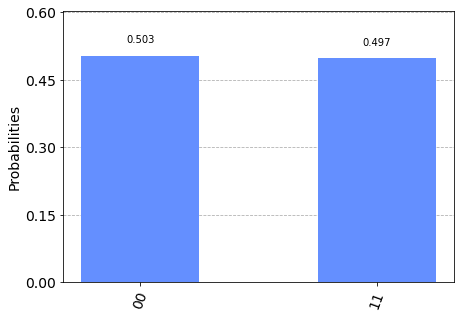

In [9]:
from qiskit.visualization import plot_histogram
counting_measured_states = sim_results.get_counts()
plot_histogram(counting_measured_states)

As we can see from the above plot, the only quantum states measured from the ```qc``` circuit simulation were $\left\lvert 0 0 \right\rangle$ and $\left\lvert 1 1 \right\rangle$, with respective probabilities $0.503$ and $0.497$. It strongly agrees with our expectations from the theoretical perspective. The differences we see in the simulation-obtained probabilities are not a concern, since this is just a consequence of the finite amount of observations performed. If we make more and more shots during the simulation, those values are both going to converge to $0.5$. So, it seems the computational resources we've implemented are working just fine. 😊

#### 2nd Approach: Experimental, 

##### $\hspace{5cm}$ a.k.a. send to IBM and run it on a real quantum computer

Yeah... Impressive, right? This is really a wonderful thing we can do. The coding necessary to do this is just as simple as (and analogous to) the one we did for the simulation. However, you must have an account on <i>IBM Quantum</i> in order to enjoy this feature.

If you already have an account saved in your local disk, you just need load your credentials, using the command ```IBMQ.load_account()```. On the other hand, if you just recently created an IBMQ account or doesn't have your account saved, you must enable it during each notebook session before a practical use; you can do this by running ```IBMQ.enable_account(<YOUR TOKEN>)```, passing your account token as an argument of the function.

In [ ]:
IBMQ.enable_account(<YOUR TOKEN>) # or just run `IBMQ.load_account()` if your credentials
                                  # are already saved locally

Once the account is loaded/enabled in the session, we just need to pass who is our provider and which backend we want to run the circuit. In the simulation case, the provider was ```Aer```, already built-in on the library. In the experimental case, the provider is going to be ```'ibm-q'``` and must be retrieved from the ```IBMQ``` section, as we need to connect to their server. With respect to the backends, the ```Aer``` ones represent different simulation methods, while the ```IBMQ``` ones represent individual (quantum computing) hardware machines.

In [11]:
provider = IBMQ.ibmq.get_provider('ibm-q') # getting the provider from IBM
real_quantum_computer = provider.get_backend('ibmq_5_yorktown') # getting the backend of the 
                                                                # 'ibmq_5_yorktown' machine 
experiment = execute(qc, backend = real_quantum_computer) # now, we send the qc circuit
                                                          # to be executed at the backend
                                                          # stored in real_quantum_computer

How can we know if our circuit was compiled? Has it started running yet?

Well, those questions can be answered by a particular tool in the library: the ```job_monitor```. As the name implies, this function will return us with some information about the job process we sent to the IBM hardware.

In [12]:
from qiskit.tools.monitor import job_monitor # retrieving job_monitor from the appropriate sector
job_monitor(experiment) # getting the monitor to tell us about the 
                        # execution stored in the `experiment` variable

Job Status: job has successfully run


Once our request has made its way into the quantum computer, after standing in a queue, it will be compiled and we'll just need to wait. After the job is completed, we may get the results and visualize them in the same manner as we did for the simulation.

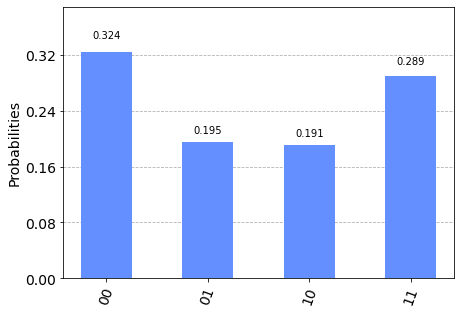

In [18]:
experiment_results = experiment.result()
plot_histogram(experiment_results.get_counts())

There we have it! A histogram from _real_ experimental measurements. However, it seems a little bit odd when compared to the simulated case and to the theoretical predictions. Indeed, we see that the states $\left\lvert 0 0 \right\rangle$ and $\left\lvert 1 1 \right\rangle$ are the most probable of being observed, however, there is some outcomes coming from $\left\lvert 0 1 \right\rangle$ and $\left\lvert 1 0 \right\rangle$. So, what's that?

&nbsp;

Well, the thing is: real quantum computers are far from being ideal. Our simulation was preset to run the circuit in an ideal scenario, and under the same assumptions underlying our theoretical evaluation. In reality, there is a lot of noise coming from the (undesired) interaction of the systems that constitute the quantum computer with the environment, i.e. outside world. As technology progresses, we hope that the noisy signal will be attenuated.